In [5]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.special import gamma as gamma_function
from scipy.special import digamma
plt.rc('font', family = 'Times New Roman')
alpha_0, alpha_1 = 1, 1
beta_0, beta_1 = 0.001, 1
K=4
p01 = 0.5
p10 = 0.5
trans_pro_C = {
    'p01':p01,
    'p10':p10,
    'p1':p01/(p01+p10)
    }
M = 64
tau = 8
L = 4

# bottom layer

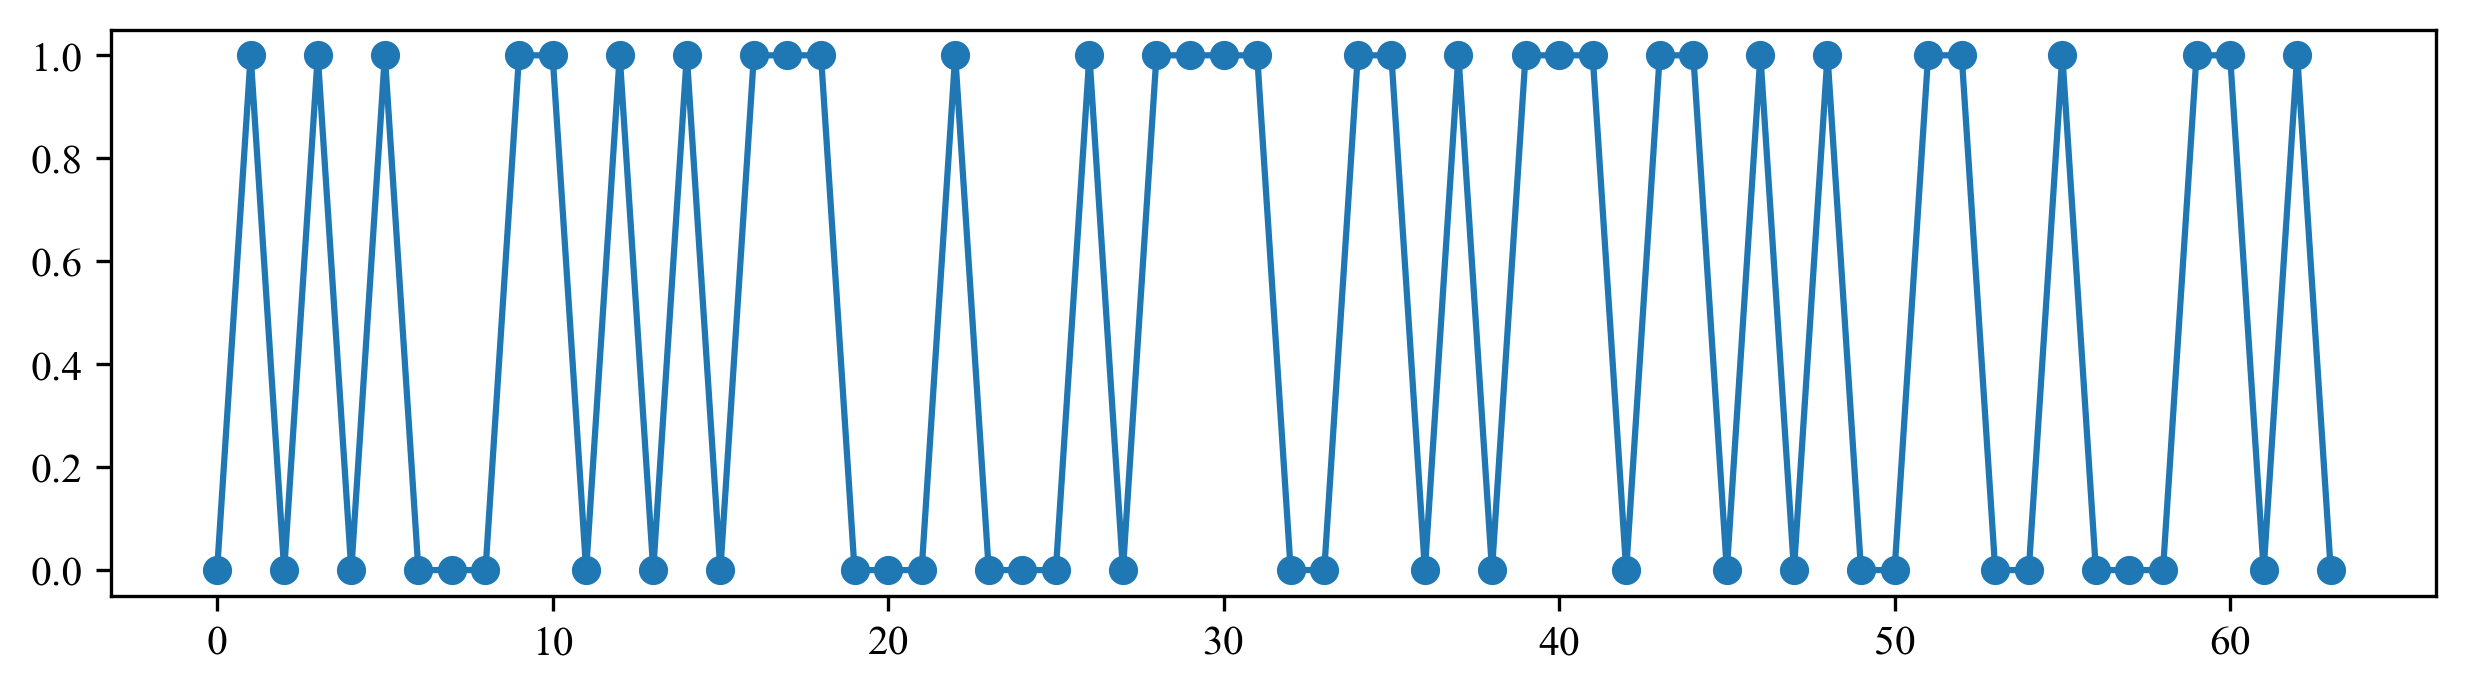

In [9]:
## generate channel support

# 6 is a nice value
from turtle import width


np.random.seed(2)
def common_channel_support(p01 = 0.1, p10=0.3, M= 64):
    p0 = p10/(p10+p01)
    p1 = 1-p0

    # generate Markov chain
    tmp_support = np.array([0.0 for m in range(M)])
    if np.random.uniform(0,1,1)[0] < p0:
        tmp_support[0] = 0
    for i in range(M - 1):
        if tmp_support[i] == 0:
            if np.random.uniform(0,1,2)[0] < p01:
                tmp_support[i+1] = 1
            else:
                tmp_support[i+1] = 0
        else:
            if np.random.uniform(0,1,2)[1] < p10:
                tmp_support[i+1] = 0
            else:
                tmp_support[i+1] = 1
    return tmp_support

common_support_varphi = common_channel_support(p01, p10, M)
plt.figure(dpi=300, figsize=(10,2.5))
plt.scatter(range(M), common_support_varphi)
plt.plot(range(M), common_support_varphi)
# plt.legend(['common_support_varphi'])
